# Project Overview

The aim of this project is to develop a machine learning model to predict whether a person’s
income exceeds $50K/yr based on census data. By leveraging various census data, I explored the data using different visualization tools, provided insights from it, engineered relevant features, built and evaluated the performance of my predictive classifier model using different metrics.


# DATA & LIBRARY IMPORTATION

In [1]:
# importing necessary libraries & loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay


df = pd.read_csv('income_data.csv') # laods dataset

# INITIAL DATA INSPECTION

In [2]:
df.head(3) # displays first 3 records of the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
df.tail(3) # displays last 3 records of the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [4]:
df.dtypes # displays the feature datatypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
df.describe() # displays the summary statistics of the numerical features

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info() # displays general information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.shape # displays the original number of records and features in the dataset

(48842, 15)

In [8]:
df.columns # checks to ensure that all the columns are in lowercase letters

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df = df.drop(['fnlwgt'],axis=1) # drops fnlwgt feature

In [10]:
df.shape # displays the original number of records and current number of features in the dataset

(48842, 14)

In [11]:
df.duplicated().sum() # identifies and count the number of duplicated records in the dataset

6281

In [12]:
df = df.drop_duplicates() # drops duplicated records in the dataset

In [13]:
df.shape # displays the new number of records and features in the dataset after dropping duplicated records

(42561, 14)

In [14]:
df.isna().sum() # identifies and counts nan values in the dataset

age                 0
workclass         872
education           0
education-num       0
marital-status      0
occupation        875
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    273
income              0
dtype: int64

In [15]:
df['workclass'].unique() # checks the unique contents of workclass feature

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [16]:
df['occupation'].unique() # checks the unique contents of occupation feature

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [17]:
df['native-country'].unique() # checks the unique contents of native-country feature

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

# INITIAL PREPROCESSING

In [18]:
cat_features = df.select_dtypes(exclude=np.number).columns.tolist() # Creates categorical features list
num_features = df.select_dtypes(include=np.number).columns.tolist() # Creates numerical features list

In [19]:
imputer = SimpleImputer(strategy='most_frequent') # initializes SimpleImputer with required parameter

for feature in cat_features: # Iterates through the category feature list
    df[feature].replace('?', pd.NA, inplace=True)  # replaces '?' values in each feature with nan values
    df[feature] = df[feature].astype('category')  # Converting each feature datatype to category type
    df[[feature]] = imputer.fit_transform(df[[feature]])  # fit and transforms all nan values in all features
    df[feature] = df[feature].astype('object')  # Converting each feature datatype to object type

In [20]:
display(df['workclass'].unique()) # inspects the unique contents of workclass feature to confirm no '?' or nan values exists

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [21]:
display(df['occupation'].unique()) # inspects the unique contents of occupation feature to confirm no '?' or nan values exists

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [22]:
#inspects the unique contents of native-country feature to confirm no '?' or nan value exists
display(df['native-country'].unique()) 

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

# EXPLORATORY DATA ANALYSIS (EDA)

In [23]:
style.use('ggplot') # sets the plot style to specified style

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.023177,0.072660,0.046878,0.037808
education-num,0.023177,1.000000,0.127645,0.081872,0.134355
capital-gain,0.072660,0.127645,1.000000,-0.035900,0.081743
capital-loss,0.046878,0.081872,-0.035900,1.000000,0.051925
hours-per-week,0.037808,0.134355,0.081743,0.051925,1.000000


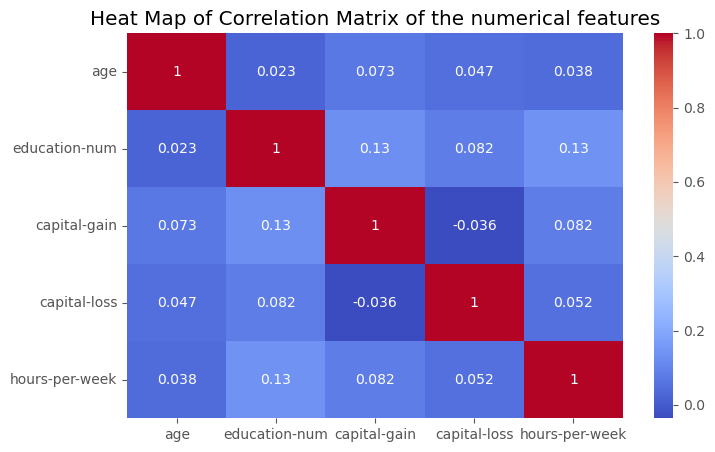

the heat map and correlation matrix reveals that all the numerical features do not correlate


In [24]:
corr_matrix = df[num_features].corr() # Correlation matrix of the numerical features
display(corr_matrix)
plt.figure(figsize=(8, 5)) # sets figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # heat map with desired arguments
plt.title('Heat Map of Correlation Matrix of the numerical features')
plt.show() # display plot
print('the heat map and correlation matrix reveals that all the numerical features do not correlate')

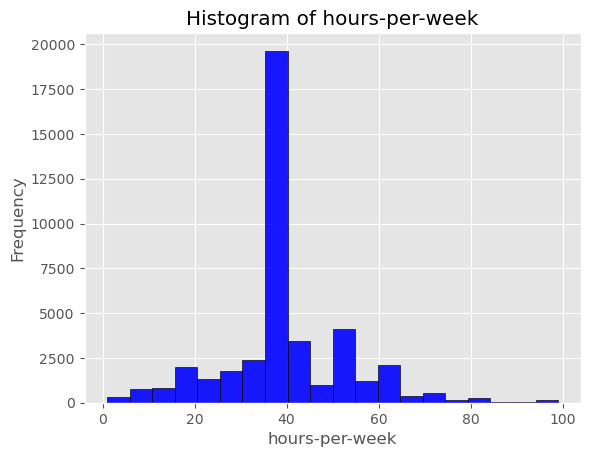

this plot reveals that more people work 40 hours per week


In [25]:
hours = df['hours-per-week'] # hours variable
plt.hist(hours, bins=20, color='blue', alpha=0.9, edgecolor='black') # historgram with desired arguments
plt.title('Histogram of hours-per-week') # histogram title
plt.xlabel('hours-per-week') # histogram x label
plt.ylabel('Frequency') # histogram y label
plt.show() # display histogram
print('this plot reveals that more people work 40 hours per week')

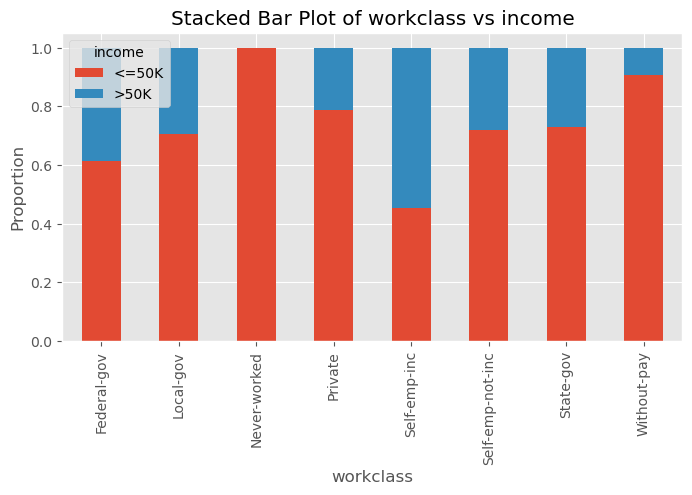

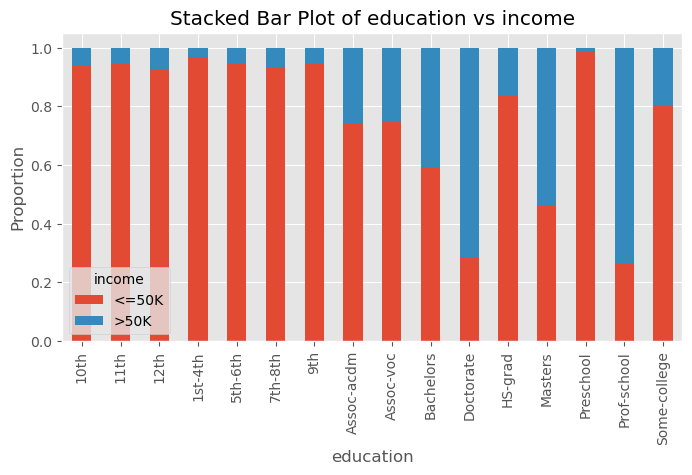

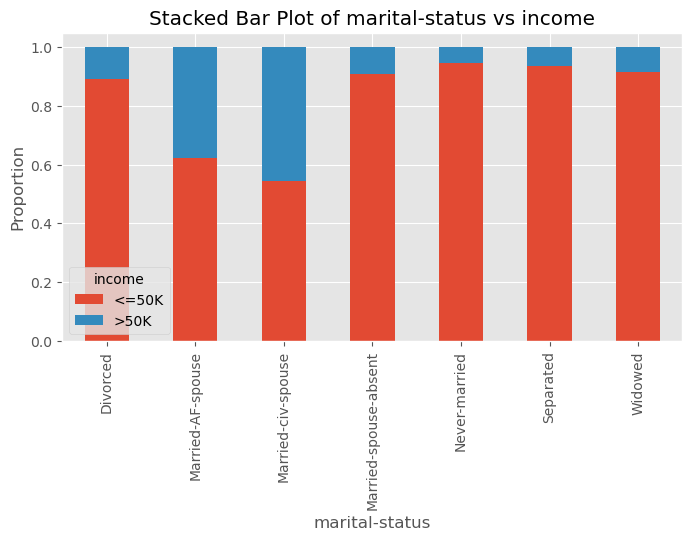

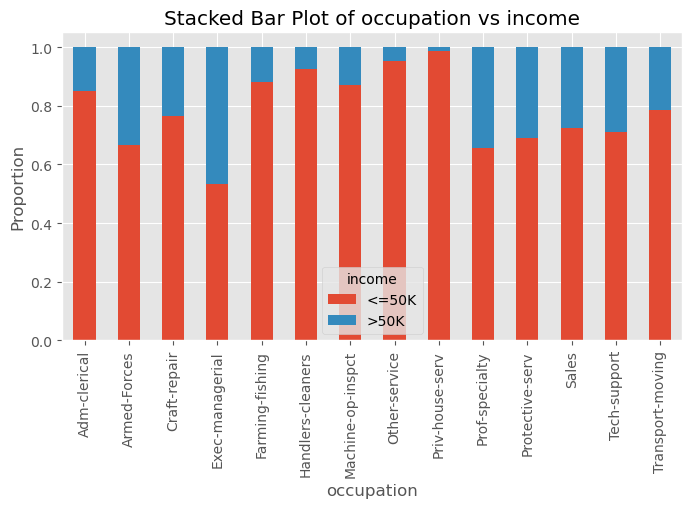

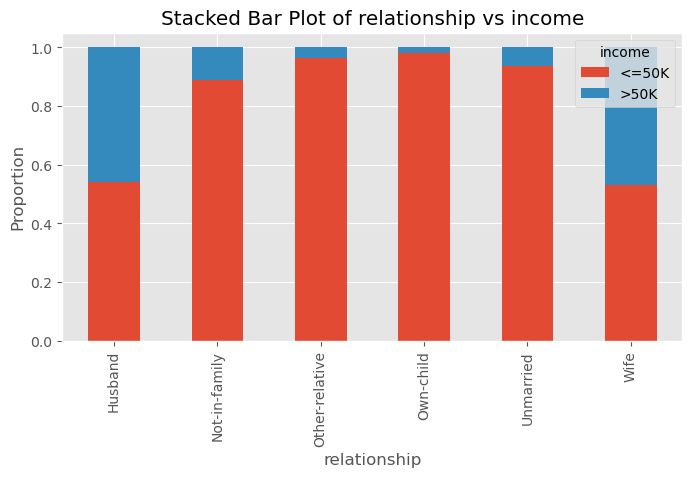

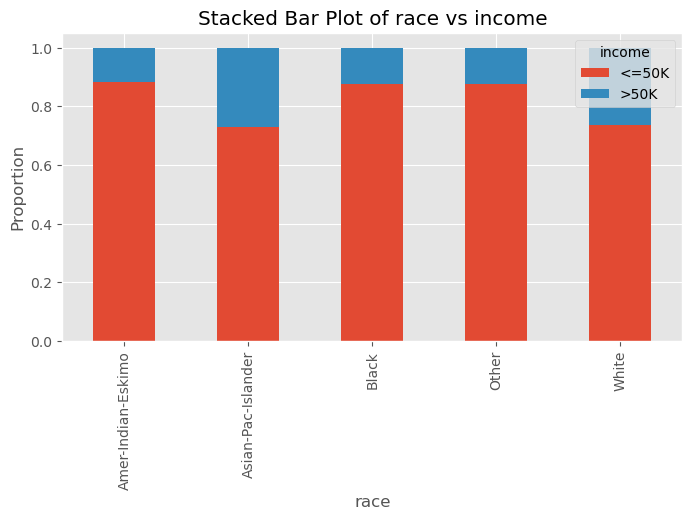

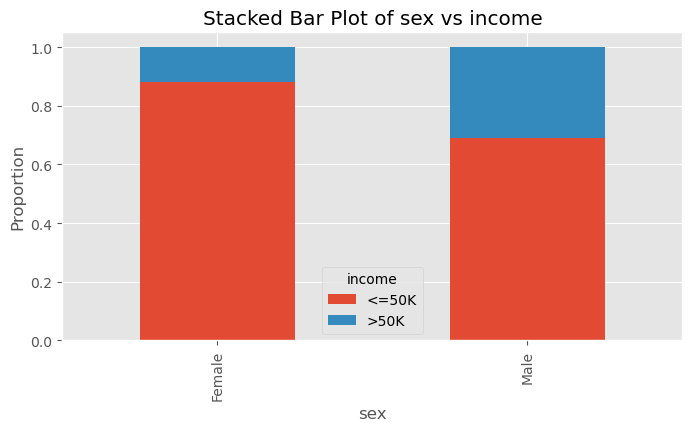

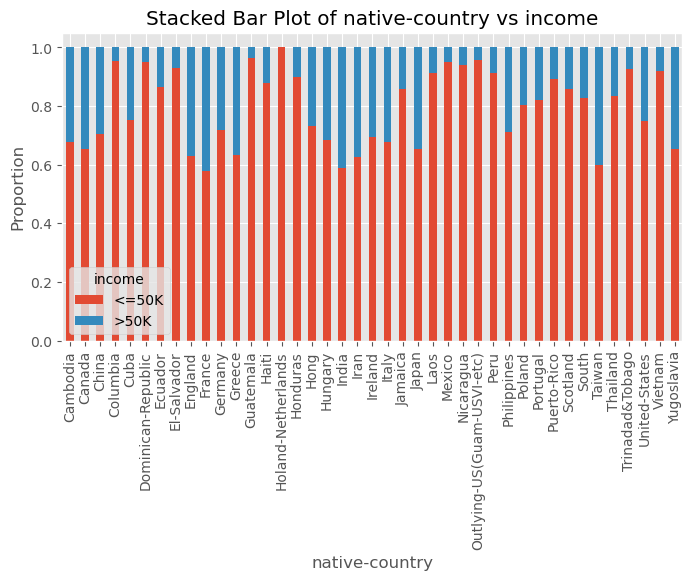

In [26]:
# A Function that creates a stacked bar plot for each categorical feature
def stacked_bar_plot(df, column, target):
    # Create a crosstab (contingency table) for the specified column and target, normalized by the index
    crosstab = pd.crosstab(df[column], df[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 4)) # Plots the crosstab as a stacked bar plot
    plt.title(f'Stacked Bar Plot of {column} vs {target}') # Sets the title of the plot
    plt.xlabel(column) # Sets the x-axis label
    plt.ylabel('Proportion') # Sets the y-axis label
    plt.legend(title=target) # Adds a legend with the title as the target column
    plt.show() # Displays the plot

# List of categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']

target_column = 'income' # Target column

# Generate stacked bar plots for each categorical column
for column in categorical_columns:
    stacked_bar_plot(df, column, target_column)


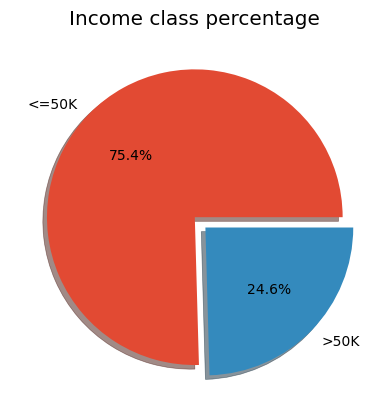

In [27]:
income_counts = df['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', explode = (0, 0.1),
        shadow={'shade': 0.1}) 
plt.title('Income class percentage')
plt.show()


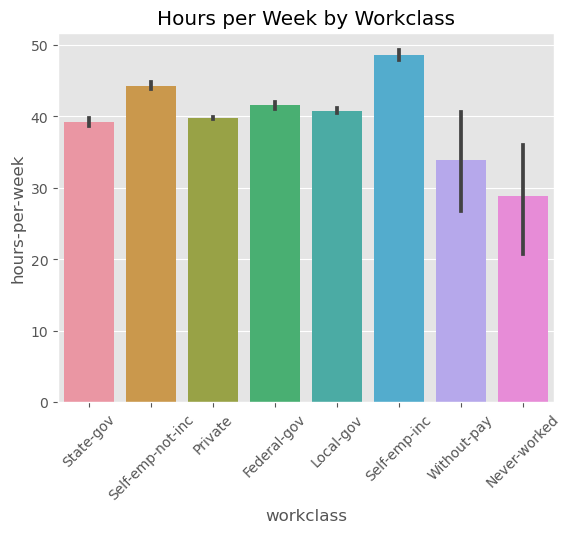

this plot reveals different work classes and hours they work, Self-emp-inc works more


In [28]:
sns.barplot(x='workclass', y='hours-per-week', data=df)
plt.title('Hours per Week by Workclass')
plt.xticks(rotation=45)
plt.show()
print("this plot reveals different work classes and hours they work, Self-emp-inc works more")

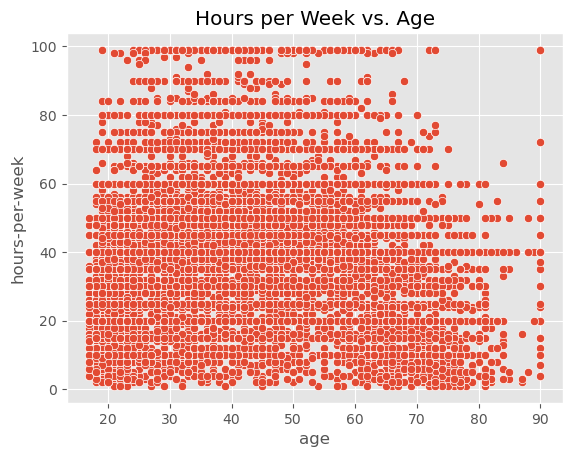

this plot reveals that the more the age, the decline in work hour per week, especially at 70 years


In [29]:
sns.scatterplot(x='age', y='hours-per-week', data=df) # n 
plt.title('Hours per Week vs. Age') # plot title
plt.show() # display plot
print('this plot reveals that the more the age, the decline in work hour per week, especially at 70 years')

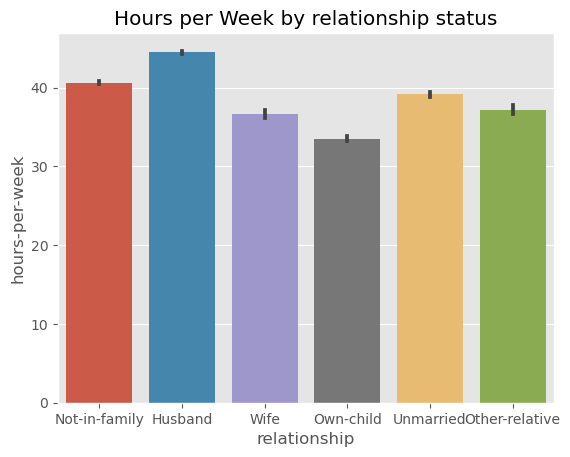

the plot reveals that husbands work more hours than other relationship status


In [30]:
sns.barplot(x='relationship', y='hours-per-week', data=df) # barplot with desired arguments
plt.title('Hours per Week by relationship status') # sets plot title
plt.show() # displays plot
print('the plot reveals that husbands work more hours than other relationship status')

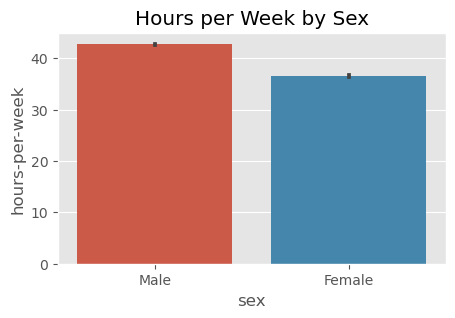

the plot shows the difference in work hours per week between males and females, with males working more


In [31]:
plt.figure(figsize=(5,3))  # sets plot size
sns.barplot(x='sex', y='hours-per-week', data=df) # bar plot with desired arguments
plt.title('Hours per Week by Sex') # sets plot title
plt.show() # displays plot
print('the plot shows the difference in work hours per week between males and females, with males working more')

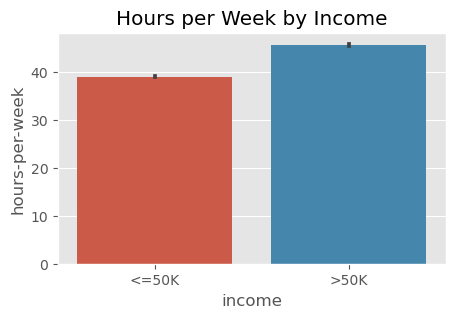

the plot shows how hours worked per week differ between different income classes (e.g., '<=50K' and '>50K')


In [32]:
plt.figure(figsize=(5,3)) # sets plot size
sns.barplot(x='income', y='hours-per-week', data=df) # bar plot with desired arguments
plt.title('Hours per Week by Income') # sets plot title
plt.show() # displays plot
print("the plot shows how hours worked per week differ between different income classes (e.g., '<=50K' and '>50K')")

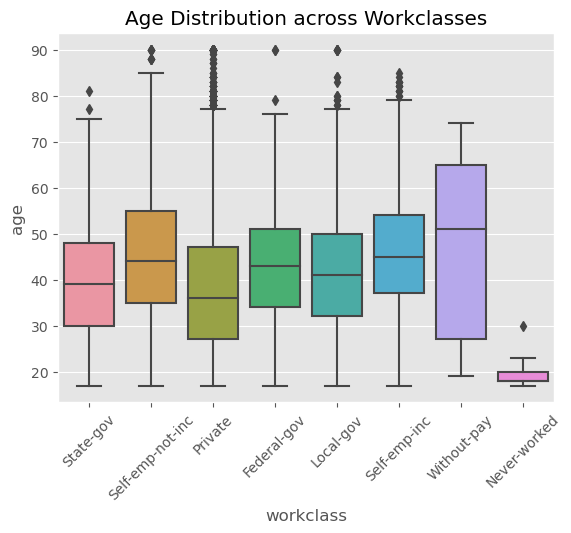

this plot reveals that people that never worked are either 20 or below 20 years


In [33]:
sns.boxplot(x='workclass', y='age', data=df) # box plot with desired arguments
plt.title('Age Distribution across Workclasses') # sets plot title
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show() # displays plot
print('this plot reveals that people that never worked are either 20 or below 20 years')

# FEATURE ENGINEERING

In [34]:
# Replace '<=50K' with 1 and '>50K' with 0
df['income'].replace('<=50K', 1, inplace=True)
df['income'].replace('>50K', 0, inplace=True)

In [35]:
# Label encode categorical features in train data set

encoder = LabelEncoder() # Initializes label encoder 

# Iterate through categorical features and apply label encoding
for feature in cat_features:
    df[feature] = encoder.fit_transform(df[feature]) # fit transforms each categorical feature

In [36]:
X = df.drop(['income'],axis=1) # predictor variable
y = df['income'] # target variable

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [37]:

scaler = StandardScaler() # Initialize StandardScaler 

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# convert the scaled data to a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Transform the testing data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# convert the scaled data to a DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# MODELS DEVELOPMENT

###### _ADABOOST CLASSIFIER HYPERPARAMETER TUNING & TRAINING_

In [38]:
# AdaBoost Classifier

# Parameters for AdaBoost
params_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 1.5]
}

# Using Grid Search for AdaBoost hyperparameter tuning
ada_grid = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),  
                                param_grid=params_ada, cv=3, n_jobs=-1) 

# Fit grid search scaled X_train data
ada_grid.fit(X_train_scaled, y_train)  

# Select the best AdaBoost model from grid search
best_ada = ada_grid.best_estimator_  

# Making Predictions on validation set using the best AdaBoost Classifier model
y_pred_ada_test = best_ada.predict(X_test_scaled)

###### _RANDOMFOREST CLASSIFIER HYPERPARAMETER TUNING & TRAINING_

In [39]:
# Random Forest Classifier

# Parameters for Random Forest
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Grid Search for Random Forest
rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),  
                                param_grid=params_rf, cv=3, n_jobs=-1) 


# Fit grid search scaled X_train data
rf_grid.fit(X_train_scaled, y_train)

# Select the best Random Forest hyperparameters
best_rf = rf_grid.best_estimator_

# Making Predictions on validation set using the best Random Forest model
y_pred_rf_test = best_rf.predict(X_test_scaled)

###### _GRADIENT BOOSTING CLASSIFIER HYPERPARAMETER TUNING & TRAINING_

In [40]:
# Gradient Boosting Classifier
# Parameters for Gradient Boosting
params_gb = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 0.05, 0.5],
'max_depth': [3, 4, 5],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'subsample': [0.8, 0.9, 1.0]
}

# Grid Search for Gradient Boosting
gb_grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),  
                                param_grid=params_gb, cv=3, n_jobs=-1) 

# Fit randomized search scaled X_train data
gb_grid.fit(X_train_scaled, y_train)

# Select the best gradient boosting hyperparameters
best_gb = gb_grid.best_estimator_

# Making Predictions on validation set using the best GradientBoosting model
y_pred_gb_test = best_gb.predict(X_test_scaled)

###### _XGBOOST CLASSIFIER HYPERPARAMETER TUNING & TRAINING_

In [41]:
# XGBClassifier

# Define parameter distributions for XGBClassifier

params_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.05, 0.5],
    'max_depth': [3, 4, 5, 6, 10],
    'min_child_weight': np.arange(1, 10),
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV for XGBoosting Classifier
xgb_grid = GridSearchCV(estimator=XGBClassifier(random_state=42),  
                                param_grid=params_xgb, cv=3, n_jobs=-1) 

# Fit grid search scaled X_train data
xgb_grid.fit(X_train_scaled, y_train)

# Select the best gradient boosting hyperparameters
best_xgb = xgb_grid.best_estimator_

# Making Predictions on validation set using the best XGBoosting Classifier model
y_pred_xgb_test = best_xgb.predict(X_test_scaled)

# MODEL EVALUATIONS

###### _METRICS COMPUTATIONS_

In [42]:
# Calculate accuracy scores for all the models
ada_accuracy = accuracy_score(y_test, y_pred_ada_test) # for ada boost model
rf_accuracy = accuracy_score(y_test, y_pred_rf_test) # for random forest model
gb_accuracy = accuracy_score(y_test, y_pred_gb_test) # for gradient boost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb_test) # for xgboost model

# Calculate precision scores for all the models
ada_precision = precision_score(y_test, y_pred_ada_test) # for ada boost model
rf_precision = precision_score(y_test, y_pred_rf_test) # for random forest model
gb_precision = precision_score(y_test, y_pred_gb_test) # for gradient boost model
xgb_precision = precision_score(y_test, y_pred_xgb_test) # for xgboost model

# Calculate recall scores for all the models
ada_recall = recall_score(y_test, y_pred_ada_test) # for ada boost model
rf_recall = recall_score(y_test, y_pred_rf_test) # for random forest model
gb_recall = recall_score(y_test, y_pred_gb_test) # for gradient boost model
xgb_recall = recall_score(y_test, y_pred_xgb_test) # for xgboost model

# Calculate F1 score scores for all the models
ada_f1 = f1_score(y_test, y_pred_ada_test) # for ada boost model
rf_f1 = f1_score(y_test, y_pred_rf_test) # for random forest model
gb_f1 = f1_score(y_test, y_pred_gb_test) # for gradient boost model
xgb_f1 = f1_score(y_test, y_pred_xgb_test) # for xgboost model

# Generates the prediction probabilities of the models
ada_proba = best_ada.predict_proba(X_test_scaled)[:,1] # for ada boost model
rf_proba = best_rf.predict_proba(X_test_scaled)[:,1] # for random forest model
gb_proba = best_gb.predict_proba(X_test_scaled)[:,1] # for gradient boost model
xgb_proba = best_xgb.predict_proba(X_test_scaled)[:,1] # for xgboost model

#Computing the ROC curve for each model
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, ada_proba) # for ada boost model
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_proba) # for random forest model
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, gb_proba) # for gradient boost model
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb_proba) # for xgboost model

# Computing AUC score for each model
ada_auc_score = auc(ada_fpr,ada_tpr) # for ada boost model
rf_auc_score = auc(rf_fpr,rf_tpr)  # for random forest model
gb_auc_score = auc(gb_fpr,gb_tpr) # for gradient boost model
xgb_auc_score = auc(xgb_fpr,xgb_tpr) # for xgboost model

# Computing Confusion matrix for each model
ada_cm = confusion_matrix(y_test, y_pred_ada_test, labels= best_ada.classes_) # for ada boost model
rf_cm = confusion_matrix(y_test, y_pred_rf_test, labels= best_ada.classes_) # for random forest model
gb_cm = confusion_matrix(y_test, y_pred_gb_test, labels= best_ada.classes_) # for gradient boost model
xgb_cm = confusion_matrix(y_test, y_pred_xgb_test, labels= best_ada.classes_) # for xgboost model

###### _CREATING METRIC SCORES DATAFRAME_

In [43]:
# Creating lists of metric values for each model
acc_score_values = [np.round(ada_accuracy*100,1),np.round(rf_accuracy * 100, 1),
                    np.round(gb_accuracy * 100, 1),np.round(xgb_accuracy * 100, 1)]

precision_score_values = [np.round(ada_precision * 100, 1),np.round(rf_precision * 100, 1),
                          np.round(gb_precision * 100, 1),np.round(xgb_precision * 100, 1)]

recall_score_values = [np.round(ada_recall * 100, 1),np.round(rf_recall * 100, 1),
                       np.round(gb_recall * 100, 1),np.round(xgb_recall * 100, 1)]

f1_score_values = [np.round(ada_f1 * 100, 1),np.round(rf_f1 * 100, 1),
                   np.round(gb_f1 * 100, 1),np.round(xgb_f1 * 100, 1)]

auc_score_values = [np.round(ada_auc_score * 100, 1),np.round(rf_auc_score * 100, 1),
                    np.round(gb_auc_score * 100, 1),np.round(xgb_auc_score * 100, 1)]

# creates a dictionary dictionary of metrix scores & model names
metric_dict = {
    'Models': ['AdaBoost', 'RandomForest', 'GradientBoost', 'XGBoost'], 
    'Accuracy score': acc_score_values,
    'Precision score': precision_score_values,
    'Recall score': recall_score_values,
    'F1 score': f1_score_values,
    'AUC score': auc_score_values}

metric_df = pd.DataFrame(metric_dict) # Create the metrix DataFrame
metric_df.set_index('Models', inplace=True) # set model list as index

###### _METRIC SCORES , ROC CURVE & CONFUSION MATRIX_

,Accuracy score,Precision score,Recall score,F1 score,AUC score
Models,,,,,
AdaBoost,86.4,88.9,93.7,91.2,92.3
RandomForest,85.7,88.1,93.6,90.8,90.9
GradientBoost,86.6,89.0,93.8,91.3,92.5
XGBoost,86.7,89.0,94.0,91.4,92.4


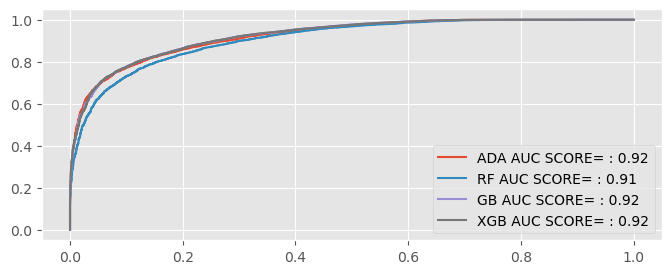

In [44]:
display(metric_df)

plt.figure(figsize=(8, 3))
plt.plot(ada_fpr,ada_tpr, label=f"ADA AUC SCORE= : {np.round(ada_auc_score,2)}")
plt.plot(rf_fpr,rf_tpr, label=f"RF AUC SCORE= : {np.round(rf_auc_score,2)}")
plt.plot(gb_fpr,gb_tpr, label=f"GB AUC SCORE= : {np.round(gb_auc_score,2)}")
plt.plot(xgb_fpr,xgb_tpr, label=f"XGB AUC SCORE= : {np.round(xgb_auc_score,2)}")
plt.legend()

###### Condition: 1 = '<=50K', 0 = '>50K'

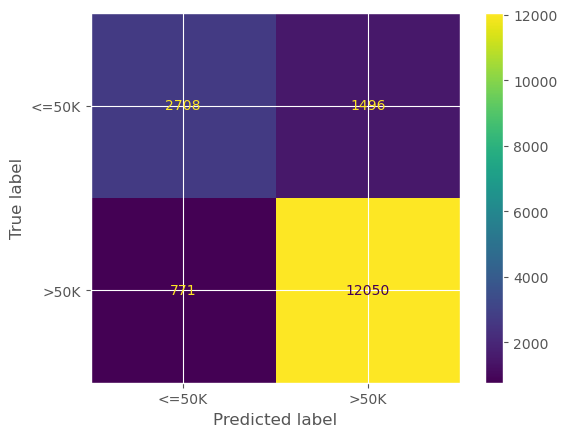

In [45]:
# Creates a ConfusionMatrixDisplay object for visualizing the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=['<=50K', '>50K'])
cm_display.plot()

# SUMMARY

###### Insights from EDA

1. The Correlation matrix heatmap for the numerical features (age, education-num, capital-gain, capital-loss, hours per week) reveals that all the numerical features do not correlate.



2. The histogram plot for "hours per week" feature reveals that more people work 40 hours per week which is often the case in a society.



3. The stacked bar plot compares all the categorical features () with income feature                                           i. workclass vs income: Neverworked earned highest in <50k class, while other workclasses had people who earned >50k, with self-emp-inc being the highest.                                                                                               ii.education vs income: Doctorate & prof-school education levels earns has highest >50k earning, PreSchool earned least in >50k class but highest in <50k class.                                                                                                  iii.Marital status vs Income: married-civ-spouse earns highest in >50k class, while never married & separated earns least.    iv. occupation vs income: exec-managerial earns highest in >50k class, while priv-house-serv earned least.                     v. relationship vs income: husbands & wife earns highest in >5ok class, while own-child earned least.                         vi. race vs income: asian-pac-islander earns highest in >50k class, while amer-indian-eskimo, black & other earned least.    vii. sex vs income: male has highest in >50k class, while female earned least.                                               viii native-country vs income: In holland-Netherland they all earned fall in <50k class, while France earned more in >50k class.



4. The pie chart for income features reveals that 75.4% of the people earns <50k while 24.6% earns >50k.



5. The bar chart plot for work class and hours per week, reveals that Self-emp-inc works more (Reason that they earned >50k more than other classes)



6. The scatter plot for hours per week and age, reveals that the more the age, the decline in work hour per week, especially at seventy (70) years'.



7. The bar chart for hours per week and relationship status, reveals that husbands work more hours than other relationship status.



8. The bar chart for hours per week & sex, reveals the difference in work hours per week between males and females, with males working more.



9. The bar chart hours per week vs income, reveals that people who earned more in >50k class, worked more hours per week. 



10. The box plot of age vs workclasses reveals that people that never worked are either 20 or below 20 years.

# MODEL PERFORMANCE EXPLANATION

My Machine learning model "XGBOOST Classifier" performes well and very effective in predicting <=50k & >50k classes, considering the metrics:
1. Accuracy of 86.7% shows that my model performs well overall.
2. Precision of 89% indicates that most positive predictions are correct, with a few false positives.
3. Recall of 94% suggests that my model captures most of the actual positive instances, with very few false negatives.
4. A high F1-score of 91.4% and an AUC score of 92.4% for my XGBoost classifier indicates that my model is well-tuned and performs excellently on the dataset. This suggests that the entire data science life cycle steps have been effectively executed, leading to a highly capable and efficient predictive model.
5. The confusion matrix reveals that my model is very good at predicting true negative (>50k income), also shows that the model predicts true positives (<=50k) to a good extent.

# RECOMMENDATIONS

Ways i can improve my ML model include:
1. Performing more hyperparameter tuning, model retraining and monitoring.
2. Documentation and experiment tracking using tools like MLflow etc can help my model significantly.
